<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/Bearing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_mapped = pd.read_csv('/content/mapped (2).csv')
df_mapped

,Timestamp_x,SensorID,SequenceNumber,TotalLength,SourceAddress,TempHumiRange,TempHumiStatus,TempHumiEvent,TempHumiSenVal,XSenEvent,...,machine12,machine13,machine14,machine15,machine16,machine17,machine18,machine19,machine20,machine21
0,1668729853,sensor2,135,88,NaN,0,0,0,34562,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
1,1668729866,sensor4,255,88,NaN,0,0,0,29875,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
2,1668730437,sensor1,72,88,NaN,0,0,0,30062,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
3,1668730753,sensor2,136,88,NaN,0,0,0,34312,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
4,1668730766,sensor4,0,88,NaN,0,0,0,29687,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,1669578553,sensor2,54,88,NaN,0,0,0,29062,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
21888,1669578553,sensor2,54,88,NaN,0,0,0,29062,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
21889,1669578553,sensor2,54,88,NaN,0,0,0,29062,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21890,1669578553,sensor2,54,88,NaN,0,0,0,29062,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
indexes = df_mapped[df_mapped['machine2'] !=1].index
df_mapped.drop(indexes,inplace=True)


df1 = df_mapped.drop(['Timestamp_x', 'SequenceNumber', 'TotalLength', 'SourceAddress', 'TempHumiRange','TempHumiStatus', 'TempHumiEvent', 'TempHumiSenVal', 'XSenEvent', 'XPeakmg', 'XRMSmg', 'XKurtosis', 'XCrestFactor','XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement', 'YSenEvent', 'YPeakmg', 'YRMSmg', 'YKurtosis', 'YCrestFactor','YSkewness', 'YDeviation', 'YPeaktoPeakDisplacement', 'ZSenEvent', 'ZPeakmg', 'ZRMSmg', 'ZKurtosis', 'ZCrestFactor','ZSkewness', 'ZDeviation', 'ZPeaktoPeakDisplacement', 'LogIndex','DeviceEvents', 'DevicePowerSrc', 'DeviceBatteryVolt', 'DeviceTime', 'Timestamp_y', 'UID'],axis='columns')
#df1=df_mapped

In [ ]:
df1.loc[:,'XOAVelocity'] /= 100
df1.loc[:,'YOAVelocity'] /= 100
df1.loc[:,'ZOAVelocity'] /= 100


len(df1)

453

In [ ]:
df_sensor1= df1[df1['SensorID'] == 'sensor1']
df_sensor2= df1[df1['SensorID'] == 'sensor2']
df_sensor3= df1[df1['SensorID'] == 'sensor3']
df_sensor4= df1[df1['SensorID'] == 'sensor4']

In [ ]:
df_sensor4.value_counts

<bound method DataFrame.value_counts of       SensorID  XOAVelocity  YOAVelocity  ZOAVelocity         converted  \
8013   sensor4         0.28         0.34         0.87   11/21/2022 9:49   
8014   sensor4         0.28         0.34         0.87   11/21/2022 9:49   
8015   sensor4         0.28         0.34         0.87   11/21/2022 9:49   
8790   sensor4         0.36         0.41         1.22   11/22/2022 1:19   
8791   sensor4         0.36         0.41         1.22   11/22/2022 1:19   
...        ...          ...          ...          ...               ...   
9991   sensor4         0.25         0.25         0.85  11/22/2022 13:49   
9992   sensor4         0.25         0.25         0.85  11/22/2022 13:49   
9997   sensor4         0.25         0.25         0.85  11/22/2022 13:49   
10018  sensor4         0.24         0.26         0.93  11/22/2022 14:04   
10019  sensor4         0.24         0.26         0.93  11/22/2022 14:04   

       Unnamed: 0  machine1  machine2  machine3  machine4  

In [ ]:
df_sensor4.columns

Index(['SensorID', 'XOAVelocity', 'YOAVelocity', 'ZOAVelocity', 'converted',
       'Unnamed: 0', 'machine1', 'machine2', 'machine3', 'machine4',
       'machine5', 'machine6', 'machine7', 'machine8', 'machine9', 'machine10',
       'machine11', 'machine12', 'machine13', 'machine14', 'machine15',
       'machine16', 'machine17', 'machine18', 'machine19', 'machine20',
       'machine21'],
      dtype='object')

In [ ]:
df_sensor4['x_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df_sensor4['XOAVelocity']]
df_sensor4['y_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df_sensor4['YOAVelocity']]
df_sensor4['z_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df_sensor4['ZOAVelocity']]

df_sensor4['faulty'] = df_sensor4.apply(lambda row: 'Faulty' if (row['x_faulty'] == 'Unsatisfactory' or row['y_faulty'] == 'Unsatisfactory' or row['z_faulty'] == 'Unsatisfactory') else 'Good', axis=1)


# select the columns from machine1 to machine 21, excluding machine2
selected_cols = df_sensor4.iloc[:, 3:25].drop(columns=['machine2'])

# check if any of the values in the selected columns is equal to 1
any_ones = selected_cols.eq(1).any(axis=1)

# set the target column to 1 if machine 2 working alone or otherwise 0
df_sensor4['target'] = any_ones.apply(lambda x: 0 if x else 1)

<ipython-input-51-c39896b86275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor4['x_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df_sensor4['XOAVelocity']]
<ipython-input-51-c39896b86275>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor4['y_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df_sensor4['YOAVelocity']]


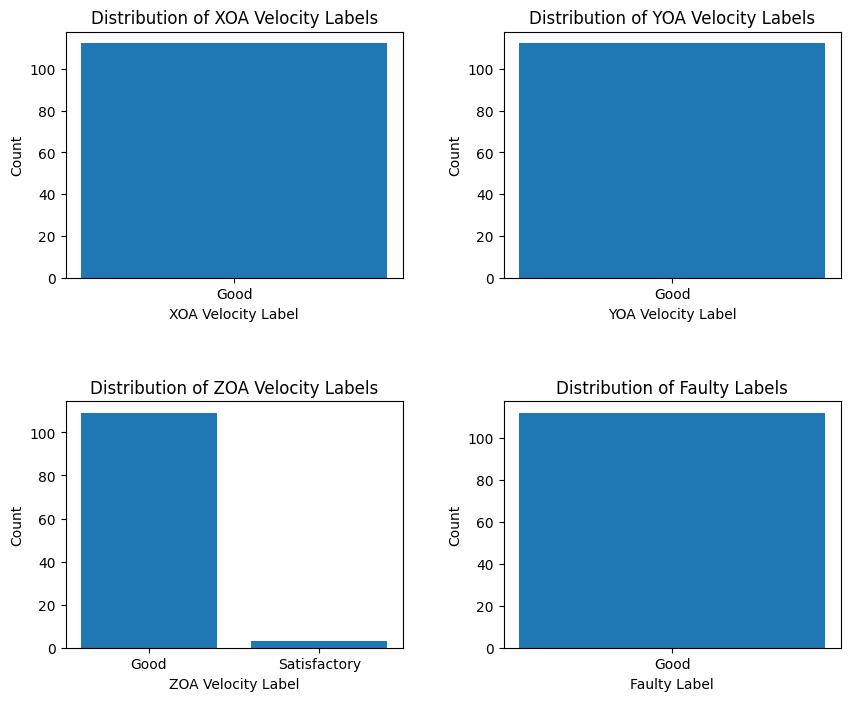

In [ ]:
# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# plot for XOAVelocity vs x_faulty
data_x = df_sensor4.groupby('x_faulty')['XOAVelocity'].count()
axes[0, 0].bar(data_x.index, data_x.values)
axes[0, 0].set_xlabel('XOA Velocity Label')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of XOA Velocity Labels')

# plot for YOAVelocity vs y_faulty
data_y = df_sensor4.groupby('y_faulty')['YOAVelocity'].count()
axes[0, 1].bar(data_y.index, data_y.values)
axes[0, 1].set_xlabel('YOA Velocity Label')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of YOA Velocity Labels')

# plot for ZOAVelocity vs z_faulty
data_z = df_sensor4.groupby('z_faulty')['ZOAVelocity'].count()
axes[1, 0].bar(data_z.index, data_z.values)
axes[1, 0].set_xlabel('ZOA Velocity Label')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of ZOA Velocity Labels')

# plot for faulty column
data_f = df_sensor4.groupby('faulty')['faulty'].count()
axes[1, 1].bar(data_f.index, data_f.values)
axes[1, 1].set_xlabel('Faulty Label')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of Faulty Labels')

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# display the plot
plt.show()

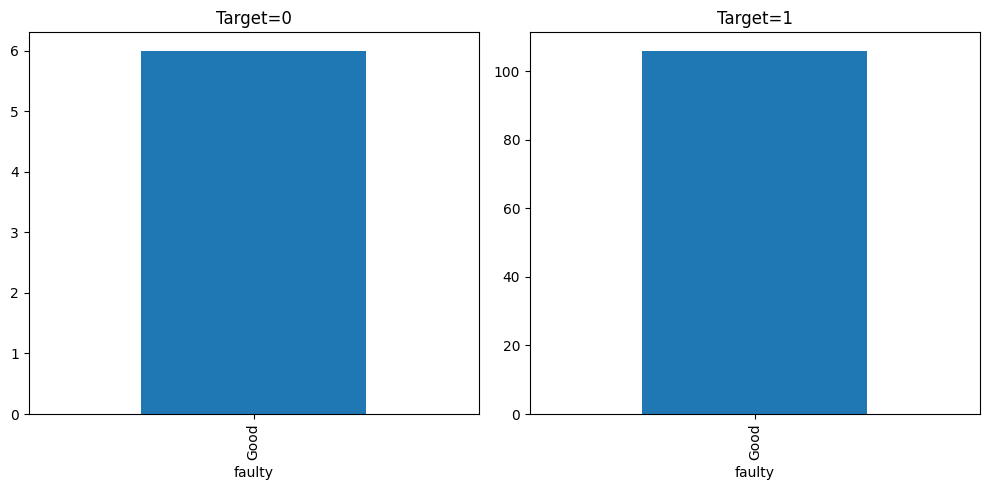

In [ ]:
# count the number of 'Faulty' and 'Good' labels for each value of 'target_column'
target_counts = df_sensor4.groupby(['target', 'faulty']).size().unstack()

# plot two bar charts, one for target_column = 0 and one for target_column = 1
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
target_counts.loc[0].plot(kind='bar', ax=axs[0], title='Target=0')
target_counts.loc[1].plot(kind='bar', ax=axs[1], title='Target=1')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score

def splitTrainTest(ratio, data, labels):

  x_train, x_test,_ = np.split(data, [round(len(data) * ratio), len(data)])
  labels_train, labels_test,_ = np.split(labels, [round(len(labels) * ratio), len(labels)])

  return (x_train,labels_train, x_test,labels_test)

# Split the dataset into training and testing sets
X_train, y_train, X_test, y_test = splitTrainTest(0.7,df_sensor4[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity','converted']], df_sensor4['faulty'])
# Create an instance of the OneClassSVM class
ocs = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

# Fit the model to the training data
ocs.fit(X_train[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])

# Predict the labels of the testing data
y_pred = ocs.predict(X_test[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])
y_test = pd.Series(np.array(y_test)).replace({"Good": 1, "Faulty": -1})

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_pred, pos_label=-1) # how many of the predicted anomalies are actually faults
recall = recall_score(y_test, y_pred, pos_label=-1) # how many of the actual faults were correctly identified as anomalies
f1score = f1_score(y_test, y_pred, pos_label=-1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
def splitTrainTest(ratio, data, labels):

  x_train, x_test,_ = np.split(data, [round(len(data) * ratio), len(data)])
  labels_train, labels_test,_ = np.split(labels, [round(len(labels) * ratio), len(labels)])

  return (x_train,labels_train, x_test,labels_test)

# Split the dataset into training and testing sets
X_train, y_train, X_test, y_test = splitTrainTest(0.6,df_sensor3[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity','converted']], df_sensor3['faulty'])



# Train the Isolation Forest classifier
classifier = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
classifier.fit(X_train[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])


y_pred = classifier.predict(X_test[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])
y_test = pd.Series(np.array(y_test)).replace({"Good": 1, "Faulty": -1})

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_pred, pos_label=-1) # how many of the predicted anomalies are actually faults
recall = recall_score(y_test, y_pred, pos_label=-1) # how many of the actual faults were correctly identified as anomalies
f1score = f1_score(y_test, y_pred, pos_label=-1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



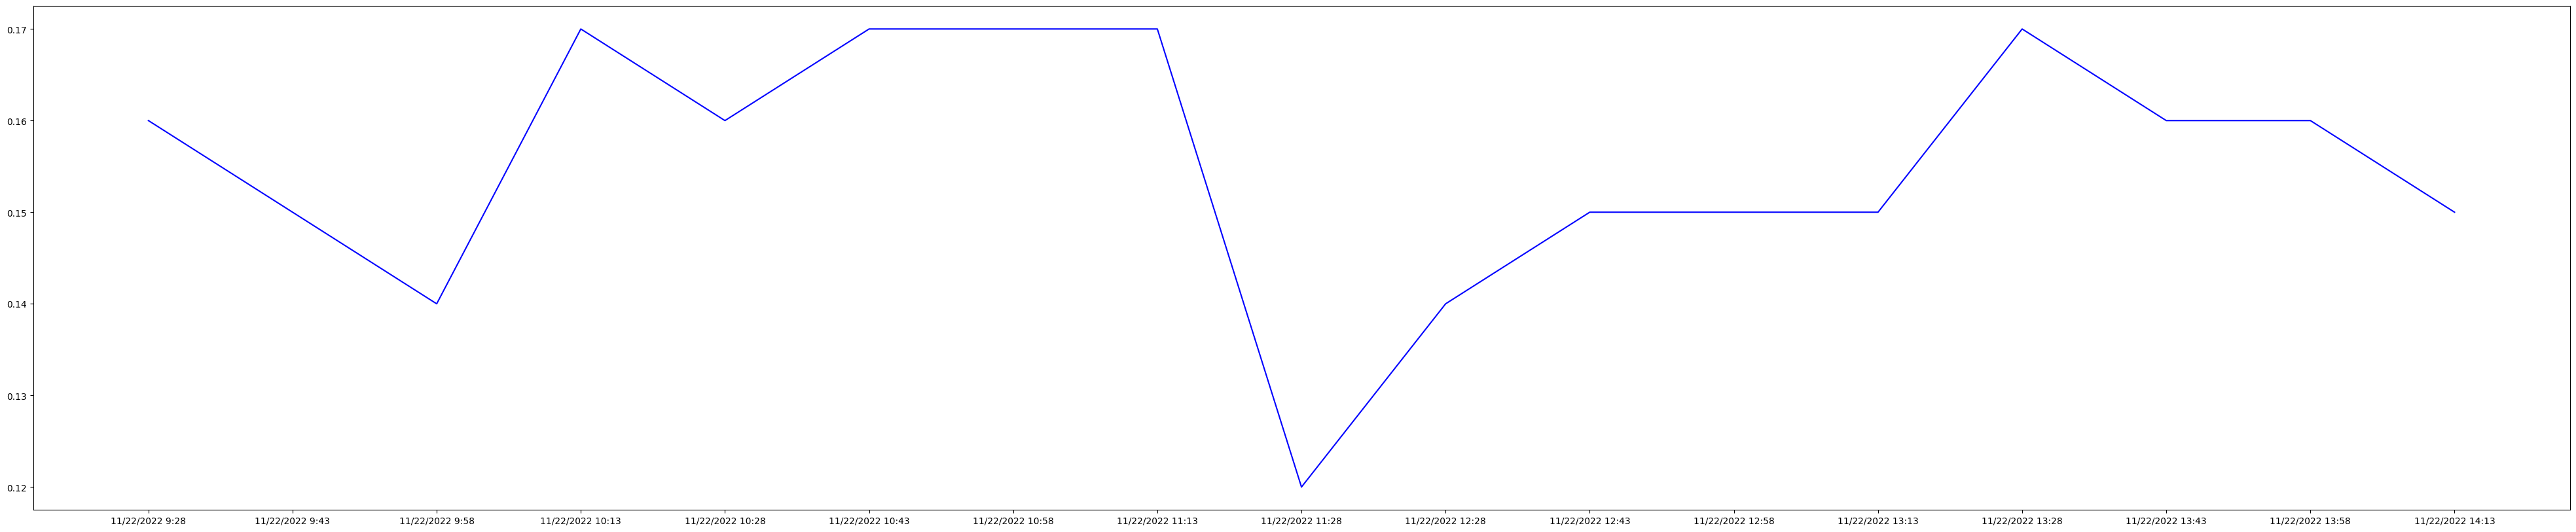

In [ ]:
fig, ax = plt.subplots(figsize=(50,10))
X_test['anomaly_svm'] = pd.Series(ocs.predict(X_test[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])).values
anomaly = X_test.loc[X_test['anomaly_svm'] == -1, ['converted', 'XOAVelocity']]



ax.plot(X_test['converted'], X_test['XOAVelocity'], color='blue')
ax.scatter(anomaly['converted'],anomaly['XOAVelocity'],  marker='X',color='red')

plt.show();
